<a href="https://colab.research.google.com/github/Sebastian-Landeo/Predecir-Poblaci-n-Mundial-ML/blob/main/PredecirPoblaci%C3%B3nMundial_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup
Primero, importemos algunos módulos comunes, asegurémonos de que MatplotLib trace figuras en línea y preparemos una función para guardar las figuras. También verificamos que Python 3.5 o posterior esté instalado (aunque Python 2.x puede funcionar, está obsoleto, por lo que usamos Python 3 en su lugar), así como Scikit-Learn ≥0.20.

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Configurando Api de Kaggle

In [ ]:
api_token = {"username":"sebastiansalcito","key":"b14a94b3a7f6d2f96388b32c98b914bc"}

In [ ]:
!rm -rf /root/.kaggle.

In [ ]:
!mkdir /root/.kaggle

In [ ]:
import json
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

## Consiguiendo la data


In [ ]:
!kaggle datasets list

ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                     📚 Students Performance Dataset 📚                    66KB  2024-06-12 23:09:20           5382        110  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024               Most Streamed Spotify Songs 2024                   496KB  2024-06-15 18:50:51           4298         96  1.0              
viveksharmar/flight-price-data                                  Flight Price Prediction                            115KB  2024-06-01 17:17:11           1266         23  1.0              
shreyanshverma27/online-sales-dataset-popular-marketplace-data  O

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mjdskaggle/2024-population-projections-by-country


Dataset URL: https://www.kaggle.com/datasets/mjdskaggle/2024-population-projections-by-country
License(s): MIT
  0% 0.00/16.3k [00:00<?, ?B/s]
100% 16.3k/16.3k [00:00<00:00, 23.9MB/s]


In [ ]:
import zipfile
archivo_zip = '/content/2024-population-projections-by-country.zip'
with zipfile.ZipFile('/content/2024-population-projections-by-country.zip', 'r') as zip_file:
  for nombre_archivo in zip_file.namelist():
    print(nombre_archivo)

2024Populations.csv


## Dando un vistazo rápido a la información
Observación:
Poblaciones históricas: 1980, 2000, 2010.

Estimaciones de la ONU: 2023, 2024

Proyecciones de la ONU: 2030, 2050

unMember: País pertenece a la ONU o no

YoYChange: Cambio de población de 2023-2024.

YoYGrowthRate: Tasa de crecimiento

WorldPercentaje: Porcentaje de la población

In [ ]:
import pandas as pd
data_com = pd.read_csv('/content/2024-population-projections-by-country.zip')
data_com.head()

,rank,country,TwoLetterID,unMember,pop1980,pop2000,pop2010,pop2023,pop2024,pop2030,pop2050,landAreaKm,2024YoYChange,2024YoYGrowthRate,2024WorldPercentage,Density_2024
0,1,India,IN,True,696828385,1059633675,1240613620,1428627663,1441719852,1514994080,1670490596,2973190.0,13092189,0.009164,0.177614,484.906734
1,2,China,CN,True,982372466,1264099069,1348191368,1425671352,1425178782,1415605906,1312636325,9424702.9,-492570,-0.000346,0.175577,151.217370
2,3,United States,US,True,223140018,282398554,311182845,339996563,341814420,352162301,375391963,9147420.0,1817857,0.005347,0.042110,37.367304
3,4,Indonesia,ID,True,148177096,214072421,244016173,277534122,279798049,292150100,317225213,1877519.0,2263927,0.008157,0.034470,149.025416
4,5,Pakistan,PK,True,80624057,154369924,194454498,240485658,245209815,274029836,367808468,770880.0,4724157,0.019644,0.030209,318.090773


**Revisamos si los datos son numéricos o categóricos**

En este vistazo se puede ver:
- Que TwoLetterID y contry pueden ser categóricos por ser de tipo object. Pero estos son identificadores y nombres, es decir, no clasifican nada.
- TwolletterId le falta 1 dato a comparación de los demás

In [ ]:
data_com.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rank                 234 non-null    int64  
 1   country              234 non-null    object 
 2   TwoLetterID          233 non-null    object 
 3   unMember             234 non-null    bool   
 4   pop1980              234 non-null    int64  
 5   pop2000              234 non-null    int64  
 6   pop2010              234 non-null    int64  
 7   pop2023              234 non-null    int64  
 8   pop2024              234 non-null    int64  
 9   pop2030              234 non-null    int64  
 10  pop2050              234 non-null    int64  
 11  landAreaKm           234 non-null    float64
 12  2024YoYChange        234 non-null    int64  
 13  2024YoYGrowthRate    234 non-null    float64
 14  2024WorldPercentage  234 non-null    float64
 15  Density_2024         234 non-null    flo

**Iterpretación de value_counts:**

***Actualización: Estos pasos ya no son necesarios***, por lo dicho arriba sobre el identificador y nombres.
La columna country es de tipo object, lo que generalmente indica que contiene datos de texto.

Frecuencia de Valores: La función value_counts() cuenta la cantidad de ocurrencias de cada valor único en la columna country. En este caso, cada país mencionado tiene exactamente 1 ocurrencia.

Número Total de Valores Únicos (length 234): Hay un total de 234 valores únicos en la columna country.

El tipo de datos del resultado (dtype): es int64, indicando que las cuentas son enteros de 64 bits. el tipo de dato int64 se refiere a los conteos de las ocurrencias, no a los nombres de los países.


In [ ]:
data_com["country"].value_counts()

country
India                 1
Reunion               1
Slovenia              1
North Macedonia       1
Latvia                1
                     ..
Dominican Republic    1
Jordan                1
South Sudan           1
Cuba                  1
Vatican City          1
Name: count, Length: 234, dtype: int64

In [ ]:
data_com["TwoLetterID"].value_counts()

TwoLetterID
IN    1
FJ    1
MK    1
LV    1
GQ    1
     ..
DO    1
JO    1
SS    1
CU    1
VA    1
Name: count, Length: 233, dtype: int64

## Analizando los estadísticos

In [ ]:
data_com.describe()

,rank,pop1980,pop2000,pop2010,pop2023,pop2024,pop2030,pop2050,landAreaKm,2024YoYChange,2024YoYGrowthRate,2024WorldPercentage,Density_2024
count,234.000000,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,2.340000e+02,234.000000,2.340000e+02,234.000000
mean,117.500000,1.898462e+07,2.626947e+07,2.984524e+07,3.437443e+07,3.468862e+07,3.651461e+07,4.148628e+07,5.571123e+05,3.141905e+05,0.009135,4.273504e-03,456.125781
std,67.694165,8.178519e+07,1.116982e+08,1.242185e+08,1.373864e+08,1.380750e+08,1.417827e+08,1.481676e+08,1.689972e+06,1.075131e+06,0.011379,1.701031e-02,1991.330932
min,1.000000,7.330000e+02,6.510000e+02,5.960000e+02,7.640000e+02,7.640000e+02,7.640000e+02,7.640000e+02,4.400000e-01,-8.043410e+05,-0.030870,9.412187e-08,0.138358
25%,59.250000,2.296142e+05,3.272420e+05,3.931490e+05,4.225982e+05,4.264565e+05,4.561490e+05,5.466058e+05,2.625875e+03,1.975000e+02,0.001928,5.253780e-05,39.801183
50%,117.500000,3.141146e+06,4.292907e+06,4.942770e+06,5.643895e+06,5.626359e+06,6.178231e+06,6.352397e+06,7.568925e+04,1.997850e+04,0.007786,6.931458e-04,98.287400
75%,175.750000,9.826054e+06,1.576230e+07,1.915957e+07,2.324537e+07,2.392272e+07,2.616311e+07,3.568614e+07,4.047876e+05,2.238608e+05,0.015670,2.947187e-03,248.223177
max,234.000000,9.823725e+08,1.264099e+09,1.348191e+09,1.428628e+09,1.441720e+09,1.514994e+09,1.670491e+09,1.637687e+07,1.309219e+07,0.048264,1.776143e-01,21674.224920


## Mostrar histogramas
La población tiene escala de $1e^9$

Se concluye que los datos más importante serán: la población de 1980, 2000, 2010; y la tasa de crecimiento. Cabe destacar que las poblacióne tiene datos outliers.

In [ ]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar las columnas numéricas
numeric_data = data_com.select_dtypes(include=[int, float])

# Crear histogramas con configuraciones personalizadas para el tamaño del texto
fig, axs = plt.subplots(nrows=(len(numeric_data.columns) // 2 + len(numeric_data.columns) % 2), ncols=2, figsize=(60, 100))

axs = axs.flatten()  # Aplanar la matriz de ejes para facilitar la iteración

for i, col in enumerate(numeric_data.columns):
    numeric_data[col].hist(bins=50, ax=axs[i])
    axs[i].set_title(col, fontsize=40)  # Títulos más grandes
    axs[i].set_xlabel('Valor', fontsize=32)  # Etiquetas del eje x más grandes
    axs[i].set_ylabel('Frecuencia', fontsize=32)  # Etiquetas del eje y más grandes
    axs[i].tick_params(axis='x', labelsize=28)  # Tamaño de las etiquetas del eje x
    axs[i].tick_params(axis='y', labelsize=28)  # Tamaño de las etiquetas del eje y

# Ajustar el diseño para evitar la superposición
plt.tight_layout()

# Guardar la figura
save_fig("attribute_histogram_plots")

# Mostrar los gráficos
plt.show()


Guardado attribute_histogram_plots.png


In [ ]:
#Normalización - todavía no usar
"""
from sklearn.preprocessing import MinMaxScaler
columnas_por_normalizar = data_com.columns[4:]
scaler = MinMaxScaler()
data_com[columnas_por_normalizar] = scaler.fit_transform(data_com[columnas_por_normalizar])
print(data_com.head())
"""

   rank        country TwoLetterID  unMember   pop1980   pop2000   pop2010  \
0     1          India          IN      True  0.709332  0.838252  0.920206   
1     2          China          CN      True  1.000000  1.000000  1.000000   
2     3  United States          US      True  0.227143  0.223399  0.230815   
3     4      Indonesia          ID      True  0.150835  0.169347  0.180995   
4     5       Pakistan          PK      True  0.082070  0.122118  0.144233   

    pop2023   pop2024   pop2030   pop2050  landAreaKm  2024YoYChange  \
0  1.000000  1.000000  1.000000  1.000000    0.181548       1.000000   
1  0.997931  0.988527  0.934397  0.785779    0.575489       0.022435   
2  0.237988  0.237088  0.232451  0.224719    0.558557       0.188694   
3  0.194266  0.194072  0.192839  0.189899    0.114645       0.220794   
4  0.168333  0.170081  0.180878  0.220180    0.047071       0.397833   

   2024YoYGrowthRate  2024WorldPercentage  Density_2024  
0           0.505899             1.00000

## Crear un conjunto de prueba

Dividir un conjunto de datos en dos subconjuntos: uno para entrenamiento y otro para prueba.

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data_com, test_size=0.2, random_state=2024)

In [ ]:
len(train_set)

187

In [ ]:
len(test_set)

47

In [ ]:
test_set.head()

,rank,country,TwoLetterID,unMember,pop1980,pop2000,pop2010,pop2023,pop2024,pop2030,pop2050,landAreaKm,2024YoYChange,2024YoYGrowthRate,2024WorldPercentage,Density_2024
98,99,Togo,TG,True,2838110,5008035,6571855,9053799,9260864,10558178,15478883,54390.0,207065,0.022871,0.001141,170.267770
99,100,Sierra Leone,SL,True,3367477,4584067,6436698,8791092,8977972,10105188,13595023,72180.0,186880,0.021258,0.001106,124.383098
220,221,British Virgin Islands,VG,False,11109,20104,27556,31538,31763,32995,34768,150.0,225,0.007134,0.000004,211.753333
185,186,Barbados,BB,True,253575,264657,274711,281995,282309,283082,267788,430.0,314,0.001113,0.000035,656.532558
79,80,Tunisia,TN,True,6578156,9893316,10895063,12458223,12564689,13100768,14315779,155360.0,106466,0.008546,0.001548,80.874672


<Axes: >

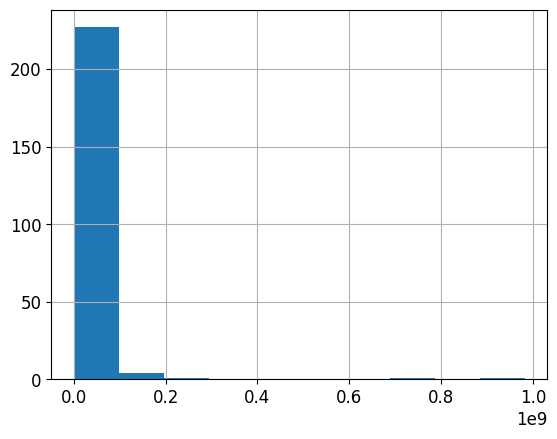

In [ ]:
data_com["pop1980"].hist()


<Axes: >

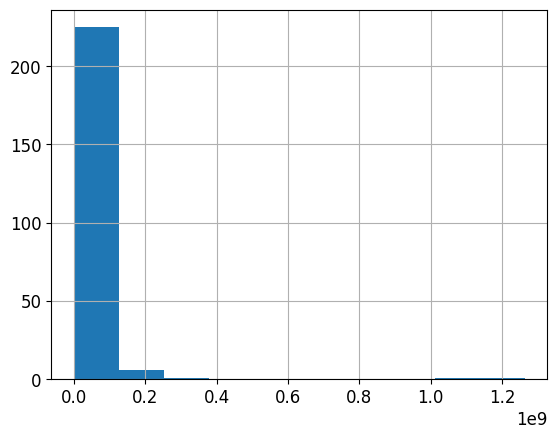

In [ ]:
data_com["pop2000"].hist()


<Axes: >

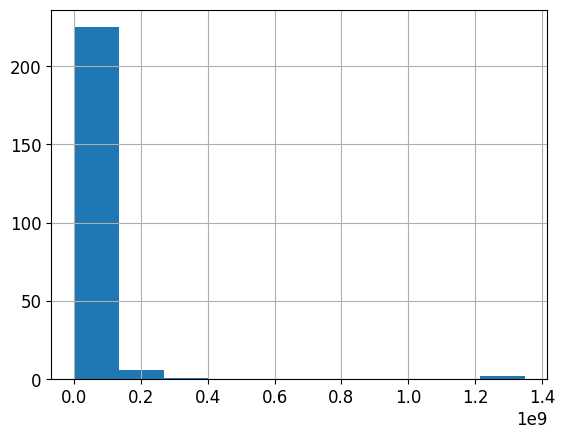

In [ ]:
data_com["pop2010"].hist()


<Axes: >

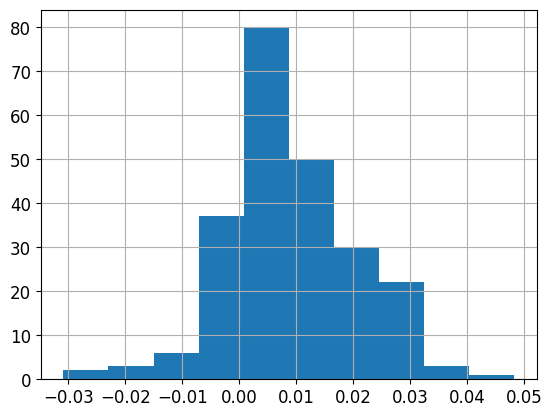

In [ ]:
data_com["2024YoYGrowthRate"].hist()

Cómo no hay datos categóricos, no hay nada que estratificar

## Visualizando la información de la población

Guardado better_visualization_plot.png


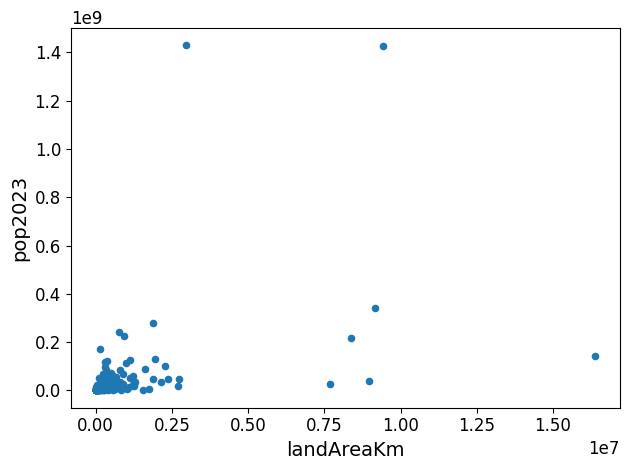

In [ ]:
data_com.plot(kind="scatter", x="landAreaKm", y="pop2023")
save_fig("better_visualization_plot")

Guardado better_visualization_plot.png


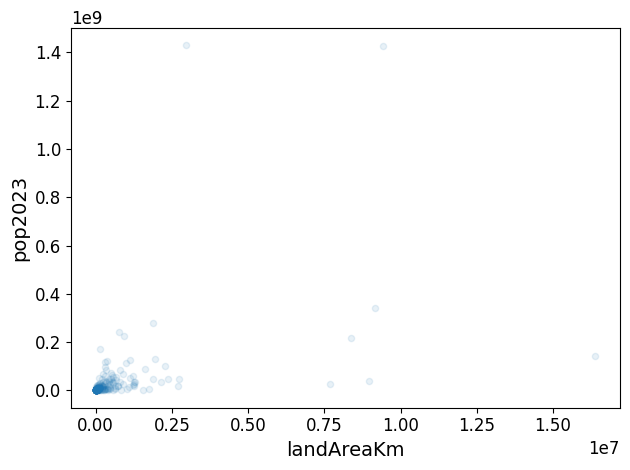

In [ ]:
data_com.plot(kind="scatter", x="landAreaKm", y="pop2023", alpha = 0.1)
save_fig("better_visualization_plot")

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


Guardado housing_prices_scatterplot.png


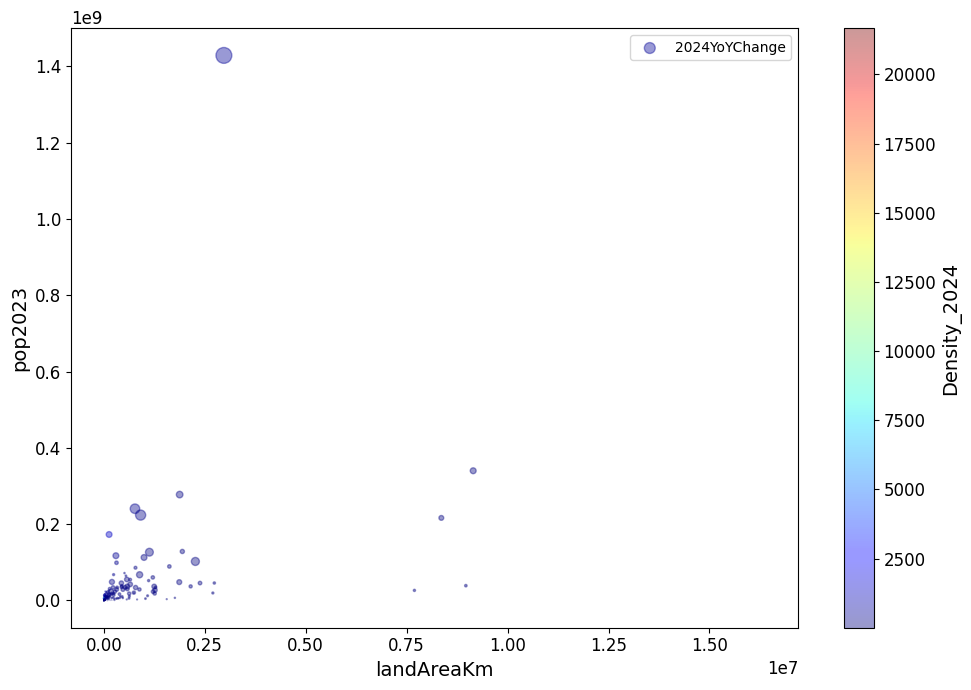

In [ ]:
data_com.plot(kind="scatter", x="landAreaKm", y="pop2023", alpha=0.4,
             s=data_com["2024YoYChange"]/100000, label="2024YoYChange", figsize=(10,7),
             c="Density_2024", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()
save_fig("housing_prices_scatterplot")

## Buscando Corelaciones
Tengo 3 columnas no numéricas: country, TwoLetterIdD, unMember. Los transformo a numéricas mediante el método One Hot Encoder, para que no de error al corelacionar.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Inicializar OneHotEncoder
encoder = OneHotEncoder()

# Seleccionar columnas no numéricas a transformar
categorical_cols = ["country", "TwoLetterID", "unMember"]

# Ajustar y transformar las columnas categóricas
encoded_data = encoder.fit_transform(data_com[categorical_cols])

# Crear un nuevo DataFrame con los datos codificados
encoded_df = pd.DataFrame.sparse.from_spmatrix(encoded_data,
                                               columns=encoder.get_feature_names_out(categorical_cols))

# Concatenar el DataFrame codificado con el DataFrame original (excluyendo las columnas originales)
data_com_encoded = pd.concat([data_com.drop(categorical_cols, axis=1), encoded_df], axis=1)



Hallando matriz de corelación

In [ ]:
# Ahora calculamos la matriz de correlación en el DataFrame codificado
corr_matrix = data_com_encoded.corr()
columnas_interes = ["pop1980", "pop2000", "pop2010", "pop2023", "pop2024", "pop2030", "pop2050", "landAreaKm", "2024YoYChange", "2024YoYGrowthRate", "Density_2024"]
print(corr_matrix.loc[columnas_interes, columnas_interes])

                    pop1980   pop2000   pop2010   pop2023   pop2024   pop2030  \
pop1980            1.000000  0.995160  0.988786  0.979229  0.978071  0.970366   
pop2000            0.995160  1.000000  0.998593  0.994023  0.993372  0.988683   
pop2010            0.988786  0.998593  1.000000  0.998326  0.997975  0.995085   
pop2023            0.979229  0.994023  0.998326  1.000000  0.999982  0.999121   
pop2024            0.978071  0.993372  0.997975  0.999982  1.000000  0.999353   
pop2030            0.970366  0.988683  0.995085  0.999121  0.999353  1.000000   
pop2050            0.937017  0.964423  0.976432  0.987094  0.988019  0.992893   
landAreaKm         0.500130  0.475309  0.463016  0.453509  0.452531  0.446786   
2024YoYChange      0.478550  0.553105  0.594379  0.638175  0.642779  0.669739   
2024YoYGrowthRate -0.056768 -0.033575 -0.019439  0.000114  0.002332  0.014899   
Density_2024      -0.025990 -0.025305 -0.025578 -0.026750 -0.026875 -0.027663   

                    pop2050

Mostraremos las relaciones entre varias combinaciones de atributos en el conjunto de datos data_com_encoded

Guardado scatter_matrix_plot.png


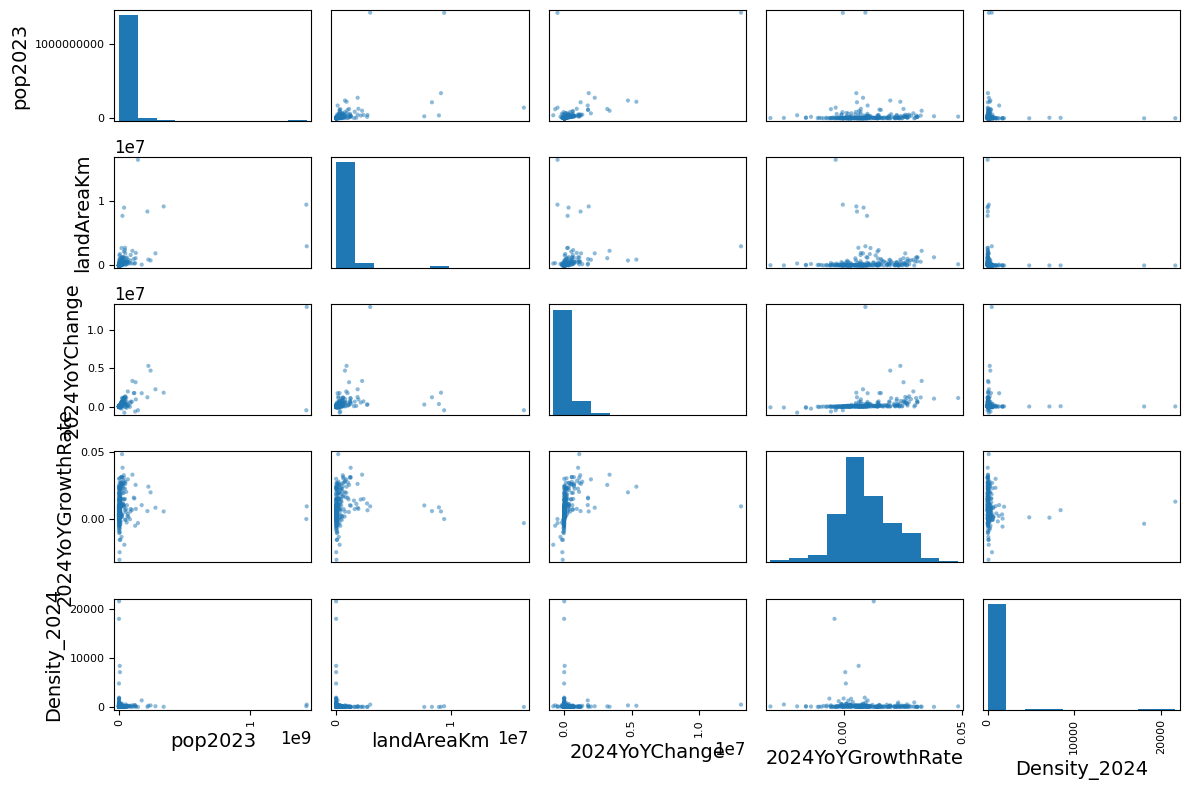

In [ ]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix
columnas_interes = ["pop2023","landAreaKm", "2024YoYChange", "2024YoYGrowthRate", "Density_2024"]
scatter_matrix(data_com_encoded[columnas_interes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

Guardado scatter_matrix_plot.png


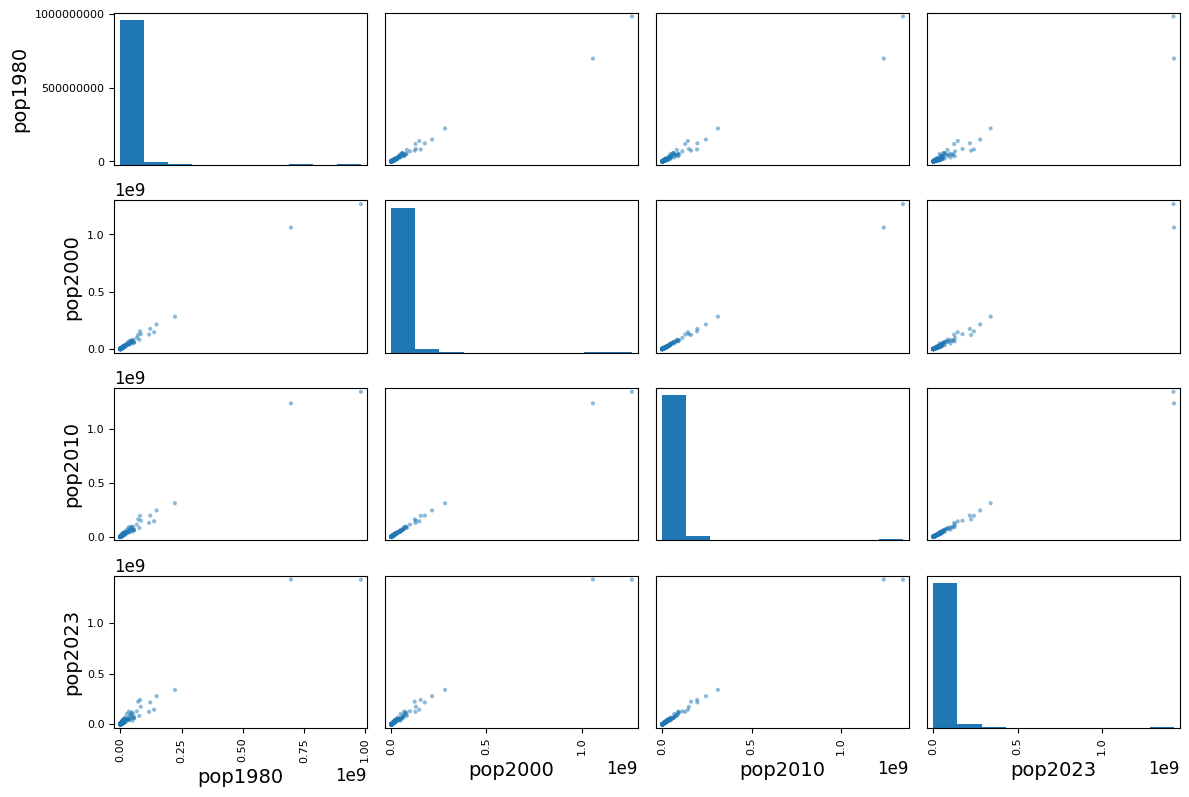

In [ ]:

columnas_interes = ["pop1980", "pop2000", "pop2010", "pop2023"]
scatter_matrix(data_com_encoded[columnas_interes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

In [ ]:
column_names = ["pop2050", "landAreaKm", "2024YoYChange", "2024YoYGrowthRate", "Density_2024"]
# Crear una matriz vacía para almacenar los resultados de las divisiones
result_matrix = np.zeros((len(column_names), len(column_names)))

# Calcular las divisiones y llenar la matriz de resultados
for i in range(len(column_names)):
    for j in range(len(column_names)):
        result_matrix[i, j] = data_com_encoded[column_names[i]][j] / data_com_encoded[column_names[j]][j]

# Imprimir la matriz de resultados formateada
print("Matriz de divisiones:")
for i in range(len(column_names)):
    for j in range(len(column_names)):
        print(f"{column_names[i]} / {column_names[j]} = {result_matrix[i, j]:.4f}")

# También puedes imprimir la matriz completa si lo deseas
print("\nMatriz completa de resultados:")
print(result_matrix)

Matriz de divisiones:
pop2050 / pop2050 = 1.0000
pop2050 / landAreaKm = 139.2761
pop2050 / 2024YoYChange = 206.5025
pop2050 / 2024YoYGrowthRate = 38888542328.5002
pop2050 / Density_2024 = 1156300.3373
landAreaKm / pop2050 = 0.0018
landAreaKm / landAreaKm = 1.0000
landAreaKm / 2024YoYChange = 5.0320
landAreaKm / 2024YoYGrowthRate = 230164482.8719
landAreaKm / Density_2024 = 2423.4592
2024YoYChange / pop2050 = 0.0078
2024YoYChange / landAreaKm = -0.0523
2024YoYChange / 2024YoYChange = 1.0000
2024YoYChange / 2024YoYGrowthRate = 277534122.0060
2024YoYChange / Density_2024 = 14851.6002
2024YoYGrowthRate / pop2050 = 0.0000
2024YoYGrowthRate / landAreaKm = -0.0000
2024YoYGrowthRate / 2024YoYChange = 0.0000
2024YoYGrowthRate / 2024YoYGrowthRate = 1.0000
2024YoYGrowthRate / Density_2024 = 0.0001
Density_2024 / pop2050 = 0.0000
Density_2024 / landAreaKm = 0.0000
Density_2024 / 2024YoYChange = 0.0000
Density_2024 / 2024YoYGrowthRate = 18268.9803
Density_2024 / Density_2024 = 1.0000

Matriz comple